<a href="https://colab.research.google.com/github/kusu182002/Project1/blob/main/Quantitative_Analysis_of_Stocks_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Title : Qunatitative Analysis of Stocks



#                               Importing required libraries

# Purpose
  Quantitative analysis can assess the risk associated with investing in a particular stock by analyzing factors such as volatility and historical performance based on factors such as correlation, and expected return.

  This helps investors understand the potential downside and volatility of a stock.Quantitative analysis can be used to identify market trends and signals for buying or selling stocks.

In [1]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Reading data from csv file

In [2]:
#importing the data using pandas
data=pd.read_csv('/content/stocks.csv',delimiter=',')
#printing the imported data
print(data)




    Ticker        Date        Open        High         Low       Close  \
0     AAPL  07-02-2023  150.639999  155.229996  150.639999  154.649994   
1     AAPL  08-02-2023  153.880005  154.580002  151.169998  151.919998   
2     AAPL  09-02-2023  153.779999  154.330002  150.419998  150.869995   
3     AAPL  10-02-2023  149.460007  151.339996  149.220001  151.009995   
4     AAPL  13-02-2023  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  01-05-2023  107.720001  108.680000  107.500000  107.709999   
244   GOOG  02-05-2023  107.660004  107.730003  104.500000  105.980003   
245   GOOG  03-05-2023  106.220001  108.129997  105.620003  106.120003   
246   GOOG  04-05-2023  106.160004  106.300003  104.699997  105.209999   
247   GOOG  05-05-2023  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  64120100  
2    150.639999  56007100  

The dataset contains the following columns for stock market data:

- Ticker: The stock ticker symbol.
- Date: The trading date.
- Open: The opening price of the stock for the day.
- High: The highest price of the stock during the day.
- Low: The lowest price of the stock during the day.
- Close: The closing price of the stock for the day.
- Adj Close: The adjusted closing price, which accounts for all corporate actions such as dividends, stock splits, etc.
- Volume: The number of shares traded during the day.

### Printing first and last five records of data.

In [3]:
#getting first five records
print(data.head())
#getting last five records
print(data.tail())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  07-02-2023  150.639999  155.229996  150.639999  154.649994   
1   AAPL  08-02-2023  153.880005  154.580002  151.169998  151.919998   
2   AAPL  09-02-2023  153.779999  154.330002  150.419998  150.869995   
3   AAPL  10-02-2023  149.460007  151.339996  149.220001  151.009995   
4   AAPL  13-02-2023  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  
    Ticker        Date        Open        High         Low       Close  \
243   GOOG  01-05-2023  107.720001  108.680000  107.500000  107.709999   
244   GOOG  02-05-2023  107.660004  107.730003  104.500000  105.980003   
245   GOOG  03-05-2023  106.220001  108.129997  105.620003  106.120003   
246   GOOG  04-05-2023  106.160004  106.300003  104.699997  105.209999   
247   GOOG  05-05-2023  105.320000  106.4

### Getting count of unique values.

In [4]:
data.nunique()

Ticker         4
Date          62
Open         244
High         248
Low          248
Close        244
Adj Close    244
Volume       248
dtype: int64

Above data indicates how many unique values do each column is having.

# Shape


In [5]:
data.shape

(248, 8)

(248, 8) indicates our data consisting of 248 rows and 8 columns.

# Getting information about data

In [6]:
#getting information of data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB
None


From above data we can say that some of the columns like Ticker are string data and some like open are float type and volume is int data type.

# Statistical information of data

In [7]:
#getting statistical information of data
descriptive_data = data.describe()
print(descriptive_data)


             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764999  212.614998  208.184998  209.920006  209.920006   
75%    304.177506  307.565002  295.437500  303.942505  303.942505   
max    372.410004  373.829987  361.739990  366.829987  366.829987   

             Volume  
count  2.480000e+02  
mean   3.208210e+07  
std    2.233590e+07  
min    2.657900e+06  
25%    1.714180e+07  
50%    2.734000e+07  
75%    4.771772e+07  
max    1.133164e+08  


From above data we are getting statistical information like mean, standard deviation, minimum,maximum values.

### Checking for missing values.

In [8]:
# check for missing values
data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

from above data we can say that our data is not having any null values.

# Processing data and cleaning the data

In [9]:
#removing duplicates
clean_data=data.drop_duplicates()
print(clean_data)

    Ticker        Date        Open        High         Low       Close  \
0     AAPL  07-02-2023  150.639999  155.229996  150.639999  154.649994   
1     AAPL  08-02-2023  153.880005  154.580002  151.169998  151.919998   
2     AAPL  09-02-2023  153.779999  154.330002  150.419998  150.869995   
3     AAPL  10-02-2023  149.460007  151.339996  149.220001  151.009995   
4     AAPL  13-02-2023  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  01-05-2023  107.720001  108.680000  107.500000  107.709999   
244   GOOG  02-05-2023  107.660004  107.730003  104.500000  105.980003   
245   GOOG  03-05-2023  106.220001  108.129997  105.620003  106.120003   
246   GOOG  04-05-2023  106.160004  106.300003  104.699997  105.209999   
247   GOOG  05-05-2023  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  64120100  
2    150.639999  56007100  

# Descriptive Statistics for each stock by grouping

In [10]:
# Descriptive Statistics for each stock with opening stock price
descriptive_stats = clean_data.groupby('Ticker')['Open'].describe()

print(descriptive_stats)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  157.779839   7.224608  144.380005  151.489998  158.400002   
GOOG     62.0  100.381919   6.197598   89.540001   94.532499  102.680000   
MSFT     62.0  274.735969  17.324808  246.550003  257.410004  277.110001   
NFLX     62.0  328.110643  18.467142  287.339996  317.137497  325.649994   

               75%         max  
Ticker                          
AAPL    164.702503  170.979996  
GOOG    105.859999  107.800003  
MSFT    285.825005  307.760010  
NFLX    340.674995  372.410004  


# Time Series Analysis

In [20]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Time Series Analysis
clean_data['Date'] = pd.to_datetime(clean_data['Date'], dayfirst=True)
pivot_data = clean_data.pivot(index='Date', columns='Ticker', values='Open')

# Create a subplot
fig1 = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig1.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig1.update_layout(
    title_text='Time Series of Opening Prices',
    xaxis_title='Date',
    yaxis_title='Opening Price',
    legend_title='Ticker',
    showlegend=True
)


# Show the plot
fig1.show()


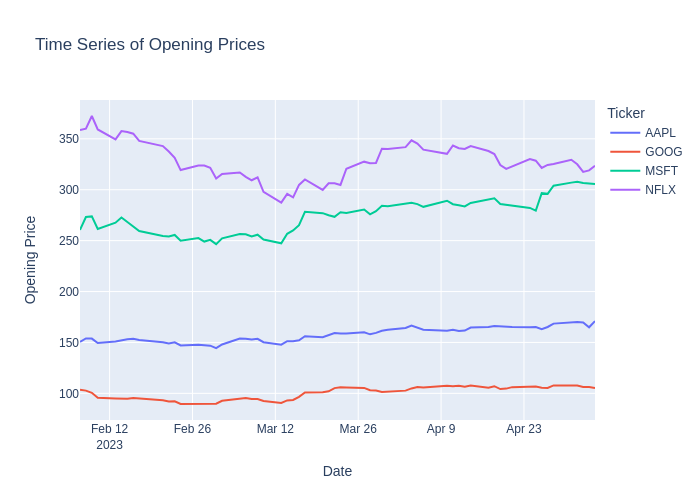

In [21]:
from IPython.display import Image
img_bytes=fig1.to_image(format="png")
Image(img_bytes)

- The above plot displays the time series of the opening prices for each stock (AAPL, GOOG, MSFT, NFLX) over the observed period.

In [23]:
# Time Series Analysis
clean_data['Date'] = pd.to_datetime(clean_data['Date'])
pivot_data = clean_data.pivot(index='Date', columns='Ticker', values='Close')

# Create a subplot
fig2 = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig2.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig2.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

# Show the plot
fig2.show()

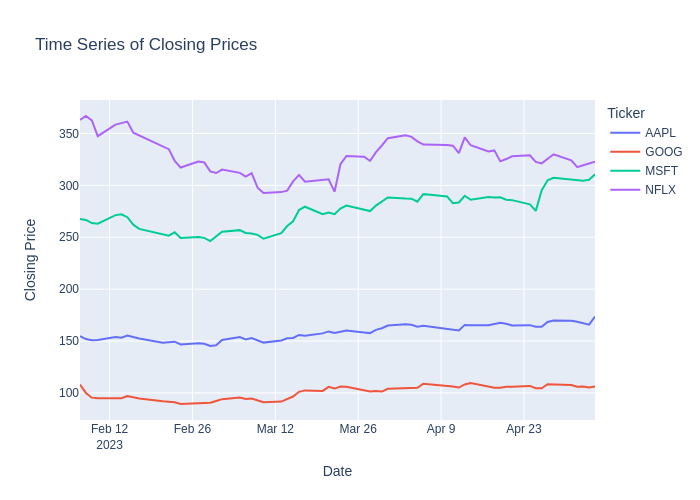

In [24]:
from IPython.display import Image
img_bytes=fig2.to_image(format="png")
Image(img_bytes)

The above plot displays the time series of the closing prices for each stock (AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

- Trend: Each stock shows its unique trend over time. For instance, AAPL and MSFT exhibit a general upward trend in this period.
- Volatility: There is noticeable volatility in the stock prices. For example, NFLX shows more pronounced fluctuations compared to others.
- Comparative Performance: When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this dataset.

 By observing above two graphs we can say that the opening stock price changes and closing stock price changes over time are almost same.

# Volatality Analysis

In [25]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig3 = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig3.show()

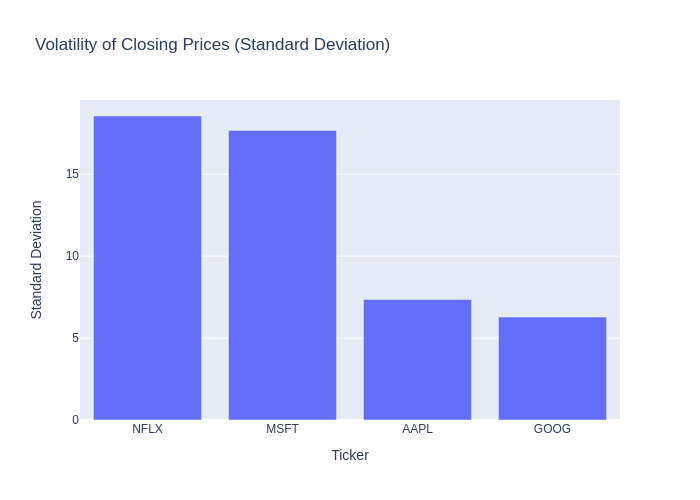

In [26]:
from IPython.display import Image
img_bytes=fig3.to_image(format="png")
Image(img_bytes)

The bar chart and the accompanying data show the volatility (measured as standard deviation) of the closing prices for each stock. Here’s how they rank in terms of volatility:

- NFLX: Highest volatility with a standard deviation of approximately 18.55.
- MSFT: Next highest, with a standard deviation of around 17.68.
- AAPL: Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.
- GOOG: The least volatile in this set, with a standard deviation of approximately 6.28.
  
  It indicates that NFLX and MSFT stocks were more prone to price fluctuations during this period compared to AAPL and GOOG.

# Correlation Analysis
Next, we’ll perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

In [14]:
#getting correlation values
correlation_matrix = pivot_data.corr()
print(correlation_matrix)

Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.901662  0.953037  0.154418
GOOG    0.901662  1.000000  0.884527  0.201046
MSFT    0.953037  0.884527  1.000000  0.191273
NFLX    0.154418  0.201046  0.191273  1.000000


In [27]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig4 = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig4.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()

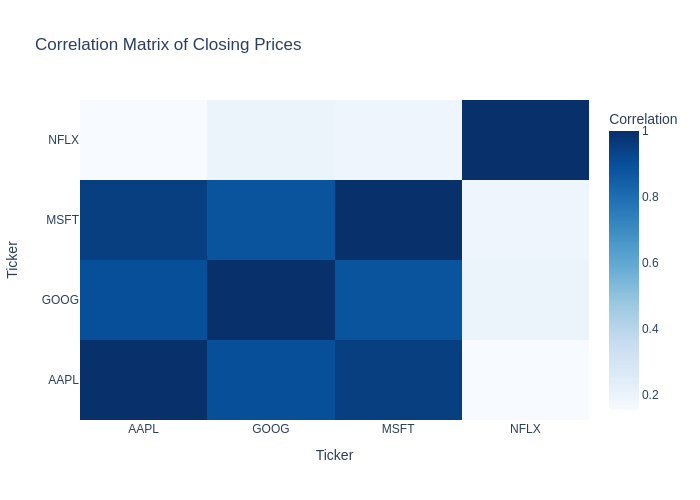

In [28]:
from IPython.display import Image
img_bytes=fig4.to_image(format="png")
Image(img_bytes)

The heatmap above displays the correlation matrix of the closing prices of the four stocks (AAPL, GOOG, MSFT, NFLX). Here’s what the correlation coefficients suggest:
- Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
- Values around 0 indicate a lack of correlation.

From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, AAPL and MSFT seem to have a relatively higher positive correlation.



# Comparative Analysis
Now, let’s move on to Comparative Analysis. In this step, we’ll compare the performance of different stocks based on their returns over the period. We’ll calculate the percentage change in closing prices from the start to the end of the period for each stock:

In [29]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100
print(percentage_change)
fig5 = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig5.show()

Ticker
AAPL    12.234086
GOOG    -1.689193
MSFT    16.104798
NFLX   -11.073151
dtype: float64


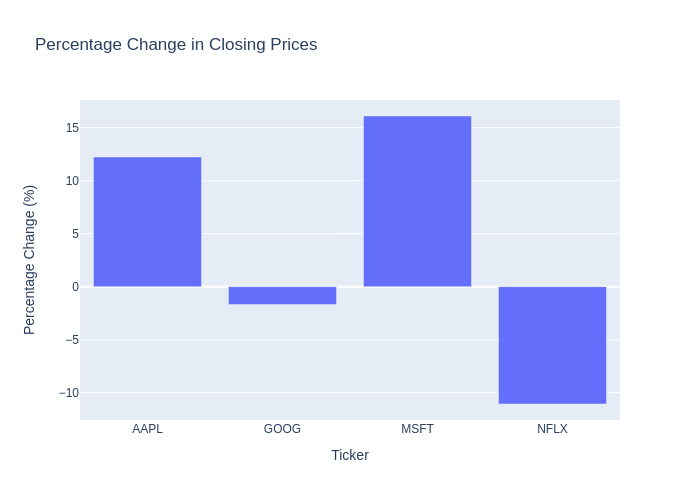

In [30]:
from IPython.display import Image
img_bytes=fig5.to_image(format="png")
Image(img_bytes)

The bar chart and the accompanying data show the percentage change in the closing prices of the stocks from the start to the end of the observed period:

- MSFT: The highest positive change of approximately 16.10%.
- AAPL: Exhibited a positive change of approximately 12.23%. It indicates a solid performance, though slightly lower than MSFT’s.
- GOOG: Showed a slight negative change of about -1.69%. It indicates a minor decline in its stock price over the observed period.
- NFLX: Experienced the most significant negative change, at approximately -11.07%. It suggests a notable decrease in its stock price during the period.


# Daily Risk Vs. Return Analysis
To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.

We will then plot these values to visually assess the risk-return profile of each stock. Stocks with higher average returns and lower risk (standard deviation) are generally more desirable, but investment decisions often depend on the investor’s risk tolerance:

In [31]:
daily_returns = pivot_data.pct_change()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig6 = go.Figure()

# Add scatter plot points
fig6.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig6.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig6.show()

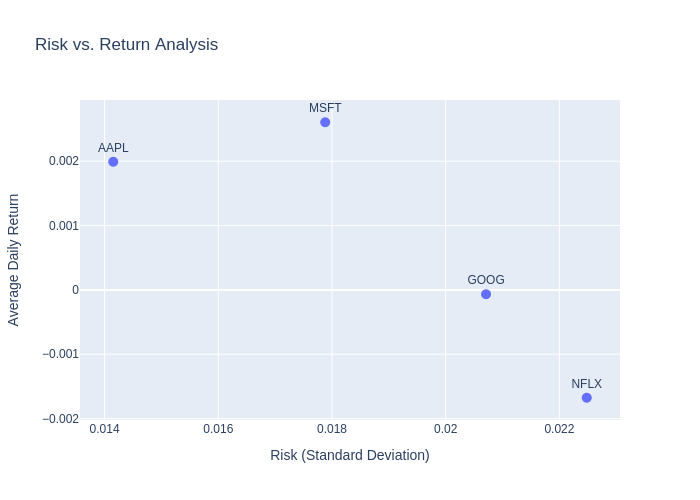

In [32]:
from IPython.display import Image
img_bytes=fig6.to_image(format="png")
Image(img_bytes)

## Conclusion
So, AAPL shows the lowest risk combined with a positive average daily return, suggesting a more stable investment with consistent returns. GOOG has higher volatility than AAPL and, on average, a slightly negative daily return, indicating a riskier and less rewarding investment during this period.

MSFT shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to AAPL. NFLX exhibits the highest risk and a negative average daily return, indicating it was the most volatile and least rewarding investment among these stocks over the analyzed period.